In [5]:

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-07-28 11:13:45--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2a00:1450:400e:80c::2010, 2a00:1450:400e:80e::2010, 2a00:1450:400e:806::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2a00:1450:400e:80c::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65,43M  18,1MB/s    in 3,6s    

2021-07-28 11:13:49 (18,1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [47]:
#Python Native
import os 
import zipfile 

#import fiftyone as fo
import fiftyone.zoo as foz

#EfficientNet
import tensorflow.keras
import efficientnet.keras as efn

#TensorFlow

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D


#TF Optimizer
from tensorflow.keras.optimizers import RMSprop

#TF APPS
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50

#Data Visualisation
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Warnings
import warnings

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

In [2]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

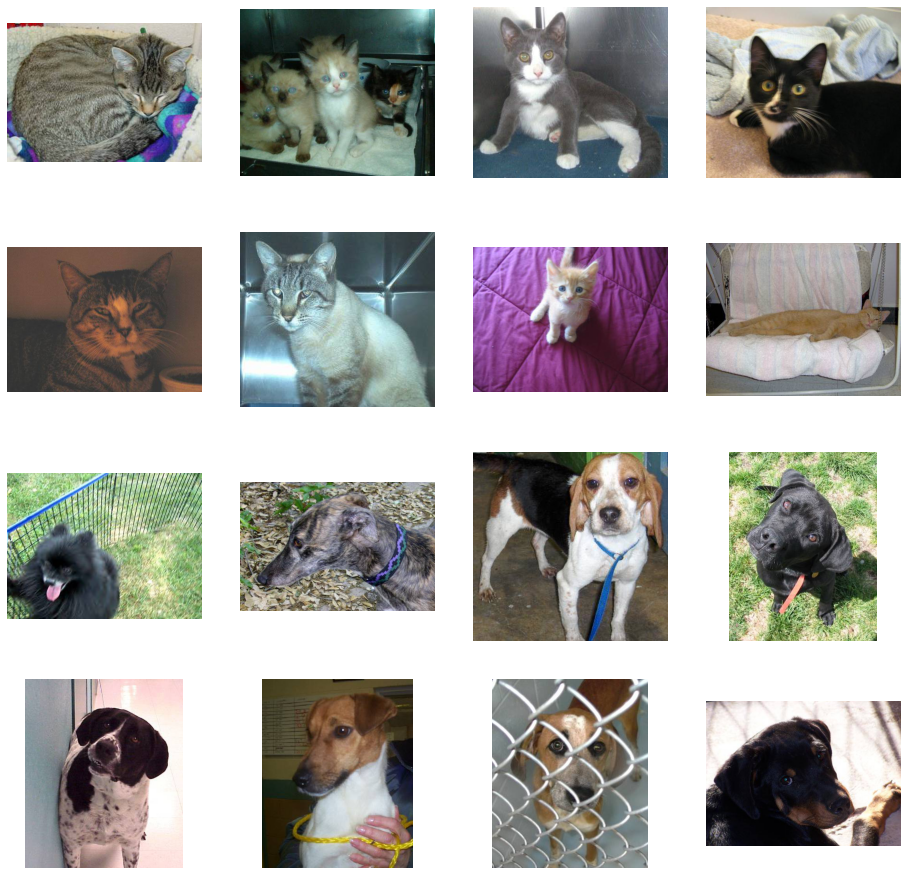

In [3]:
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Very Deep Convolutional Network for large scale image recognition

In [4]:

# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [5]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


/home/sergei/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


Epoch 1/10
100/100 [==============================] - 283s 3s/step - loss: 0.7020 - acc: 0.6600 - val_loss: 0.5712 - val_acc: 0.7210
Epoch 2/10
100/100 [==============================] - 287s 3s/step - loss: 0.4684 - acc: 0.7735 - val_loss: 0.3368 - val_acc: 0.8430
Epoch 3/10
100/100 [==============================] - 289s 3s/step - loss: 0.4082 - acc: 0.7975 - val_loss: 0.2468 - val_acc: 0.8970
Epoch 4/10
100/100 [==============================] - 289s 3s/step - loss: 0.3941 - acc: 0.8335 - val_loss: 0.2121 - val_acc: 0.9230
Epoch 5/10
100/100 [==============================] - 288s 3s/step - loss: 0.3680 - acc: 0.8380 - val_loss: 0.2759 - val_acc: 0.8840
Epoch 6/10
100/100 [==============================] - 292s 3s/step - loss: 0.3642 - acc: 0.8450 - val_loss: 0.1944 - val_acc: 0.9240
Epoch 7/10
100/100 [==============================] - 288s 3s/step - loss: 0.3389 - acc: 0.8505 - val_loss: 0.2525 - val_acc: 0.8990
Epoch 8/10
100/100 [==============================] - 288s 3s/step - 

In [11]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


In [12]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


/home/sergei/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 292s 3s/step - loss: 0.7752 - acc: 0.6735 - val_loss: 0.2755 - val_acc: 0.8850
Epoch 2/10
100/100 [==============================] - 293s 3s/step - loss: 0.4985 - acc: 0.7675 - val_loss: 0.2344 - val_acc: 0.9130
Epoch 3/10
100/100 [==============================] - 293s 3s/step - loss: 0.4458 - acc: 0.7935 - val_loss: 0.2189 - val_acc: 0.9110
Epoch 4/10
100/100 [==============================] - 294s 3s/step - loss: 0.3925 - acc: 0.8305 - val_loss: 0.3558 - val_acc: 0.8290
Epoch 5/10
100/100 [==============================] - 294s 3s/step - loss: 0.3750 - acc: 0.8450 - val_loss: 0.2398 - val_acc: 0.8930
Epoch 6/10
100/100 [==============================] - 292s 3s/step - loss: 0.3692 - acc: 0.8445 - val_loss: 0.1999 - val_acc: 0.9210
Epoch 7/10
100/100 [==============================] - 302s 3s/step - loss: 0.3374 - acc: 0.8575 - val_loss: 0.1895 - val_acc: 0.9280
Epoch 8/10
100/100 [==============================] - 294s 3s/step - 

# Inception

In [21]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [22]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [23]:
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')


87916544/87910968 [==============================] - 4s 0us/step


In [24]:
for layer in base_model.layers:
    layer.trainable = False

In [25]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [26]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


Epoch 1/10
100/100 [==============================] - 33s 307ms/step - loss: 1.2830 - acc: 0.8375 - val_loss: 0.1563 - val_acc: 0.9410
Epoch 2/10
100/100 [==============================] - 31s 308ms/step - loss: 0.4094 - acc: 0.8995 - val_loss: 0.2525 - val_acc: 0.9390
Epoch 3/10
100/100 [==============================] - 32s 320ms/step - loss: 0.3557 - acc: 0.9050 - val_loss: 0.3562 - val_acc: 0.9060
Epoch 4/10
100/100 [==============================] - 31s 313ms/step - loss: 0.3009 - acc: 0.9090 - val_loss: 0.1722 - val_acc: 0.9500
Epoch 5/10
100/100 [==============================] - 32s 318ms/step - loss: 0.3252 - acc: 0.9130 - val_loss: 0.2685 - val_acc: 0.9390
Epoch 6/10
100/100 [==============================] - 32s 323ms/step - loss: 0.3203 - acc: 0.9120 - val_loss: 0.1490 - val_acc: 0.9540
Epoch 7/10
100/100 [==============================] - 32s 321ms/step - loss: 0.3294 - acc: 0.9170 - val_loss: 0.2163 - val_acc: 0.9470
Epoch 8/10
100/100 [==============================] - 3

# ResNet 50

In [33]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [34]:
base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")


In [35]:
for layer in base_model.layers:
    layer.trainable = False

In [36]:
base_model = Sequential()
base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
base_model.add(Dense(1, activation='sigmoid'))

In [37]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])


In [38]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


Epoch 1/10
100/100 [==============================] - 334s 3s/step - loss: 1.3992 - acc: 0.6795 - val_loss: 1.6586 - val_acc: 0.4980
Epoch 2/10
100/100 [==============================] - 335s 3s/step - loss: 0.6700 - acc: 0.8290 - val_loss: 1.2195 - val_acc: 0.5170
Epoch 3/10
100/100 [==============================] - 336s 3s/step - loss: 0.4679 - acc: 0.8720 - val_loss: 1.5489 - val_acc: 0.5330
Epoch 4/10
100/100 [==============================] - 354s 4s/step - loss: 0.3732 - acc: 0.8790 - val_loss: 1.2674 - val_acc: 0.5680
Epoch 5/10
100/100 [==============================] - 357s 4s/step - loss: 0.3867 - acc: 0.9030 - val_loss: 0.9975 - val_acc: 0.6150
Epoch 6/10
100/100 [==============================] - 342s 3s/step - loss: 0.3235 - acc: 0.9160 - val_loss: 0.8136 - val_acc: 0.7050
Epoch 7/10
100/100 [==============================] - 337s 3s/step - loss: 0.3443 - acc: 0.9120 - val_loss: 0.6306 - val_acc: 0.8020
Epoch 8/10
100/100 [==============================] - 342s 3s/step - 

# EfficientNet

In [39]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
base_model = efn.keras.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')


AttributeError: module 'efficientnet' has no attribute 'keras'

In [40]:
for layer in base_model.layers:
    layer.trainable = False

In [41]:
model_final.compile(optimizers.rmsprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])


NameError: name 'model_final' is not defined

In [42]:
eff_history = model_final.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)


NameError: name 'model_final' is not defined